In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re

In [58]:
df = pd.read_csv('train.csv')

<ipython-input-58-cd75a77447fc>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [59]:
test = pd.read_csv('test.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [61]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [62]:
df.shape

(100000, 28)

In [63]:
#Drop the column which is out of model scope
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_df = df.drop(d_col , axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [64]:
drop_df.isnull().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Delay_from_due_date,0
Num_of_Delayed_Payment,7002
Outstanding_Debt,0
Credit_History_Age,9030
Payment_of_Min_Amount,0
Total_EMI_per_month,0
Payment_Behaviour,0


In [65]:
drop_na = drop_df.dropna().copy()


In [66]:
# Check unique for missing value or incorrect data
for i in drop_na:
  print('\n',i,drop_na[i].unique())


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Delay_from_due_date [ 3  5  8  7 13 10  0  4  1  9 11 -1 30 31 34 27 14  2 -2 16 17 15 23 22
 12 18 19 51 53 26 48 43 52 28 25 20 49 61 29 50 58 45  6 55 56 59 57 54
 62 67 36 41 21 24 65 33 32 39 47 46 60 64 35 44 38 -3 63 42 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '4' '8_' '1' '-1' '3_' '0' '8' '6' '5' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '538'
 '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707' '26_' '18_' '28'
 '17_' '5_' '1867' '2250'

In [67]:
#Drop the incorrect data
drop_na = drop_na[drop_na['Occupation'].str.contains('_______') == False]
drop_na = drop_na[drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [68]:
# Revise the incorrect data whole table
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in col_int:
  for c in sym:
    drop_na[i] = drop_na[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_na[i] = drop_na[i].replace(c,'')
drop_na.head()


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22 Years and 7 Months,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good


In [69]:
#Transform the information to the value
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')

In [70]:
#Transform the information to the value as level
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,4,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,2,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,1,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,1,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,6,484.5912142650067,Good


In [71]:
#Transform the object data the be float data type
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

,0
Age,float64
Occupation,object
Annual_Income,float64
Delay_from_due_date,float64
Num_of_Delayed_Payment,float64
Outstanding_Debt,float64
Credit_History_Age,float64
Payment_of_Min_Amount,object
Total_EMI_per_month,float64
Payment_Behaviour,float64


In [72]:
# Transform the target data to numerical
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Good', '3', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Standard', '2', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Poor', '1', n=-1)
drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)

drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('No', '2')
drop_na['Payment_of_Min_Amount'] = drop_na[['Payment_of_Min_Amount']].apply(pd.to_numeric)
drop_na

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


In [73]:
drop_na.dtypes


,0
Age,float64
Occupation,object
Annual_Income,float64
Delay_from_due_date,float64
Num_of_Delayed_Payment,float64
Outstanding_Debt,float64
Credit_History_Age,float64
Payment_of_Min_Amount,int64
Total_EMI_per_month,float64
Payment_Behaviour,float64


In [74]:
#Collect only integer in df['Age']
import re
def extract_numeric(value):
    match = re.search(r'\d+', str(value))
    if match:
        return int(match.group())
    else:
        return None

drop_na['Age'] = drop_na['Age'].apply(extract_numeric)


In [75]:
# collect the value of df['Age'] between 0 to 150
drop_na['Age'] = drop_na['Age'].astype(int)
drop_na = drop_na[(drop_na['Age'] >= 0) & (drop_na['Age'] <= 150)]

In [76]:
drop_na = drop_na.drop_duplicates()
drop_na.count()

,0
Age,69830
Occupation,69830
Annual_Income,69830
Delay_from_due_date,69830
Num_of_Delayed_Payment,69830
Outstanding_Debt,69830
Credit_History_Age,69830
Payment_of_Min_Amount,69830
Total_EMI_per_month,69830
Payment_Behaviour,69830


In [77]:
df_cleaned = drop_na
df_cleaned.describe()


,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,69830.000000,6.983000e+04,69830.000000,69830.000000,69830.000000,69830.000000,69830.000000,69830.000000,69830.000000,6.983000e+04,69830.000000
mean,33.351353,1.759218e+05,21.053544,31.132107,1422.347181,18.389835,1.237863,1395.898597,3.271932,-3.341448e+22,1.886754
std,10.827750,1.437156e+06,14.867198,227.706629,1151.392869,8.289925,0.648614,8261.825886,1.845736,3.337245e+24,0.674879
min,14.000000,7.005930e+03,-5.000000,-3.000000,0.230000,0.100000,0.000000,0.000000,1.000000,-3.333333e+26,1.000000
25%,24.000000,1.933483e+04,10.000000,9.000000,565.720000,12.100000,1.000000,30.138053,1.000000,2.698418e+02,1.000000
50%,33.000000,3.696676e+04,18.000000,14.000000,1163.470000,18.200000,1.000000,68.404215,3.000000,3.363865e+02,2.000000
75%,42.000000,7.230696e+04,28.000000,18.000000,1940.490000,25.100000,2.000000,156.604085,5.000000,4.709015e+02,2.000000
max,142.000000,2.419806e+07,67.000000,4397.000000,4998.070000,33.800000,2.000000,82331.000000,6.000000,1.602041e+03,3.000000


In [78]:
# Drop outlier by IQR calculation
Q1 = df_cleaned.Annual_Income.quantile(0.25)
Q3 = df_cleaned.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_cleaned

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,25,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


<Axes: xlabel='Annual_Income'>

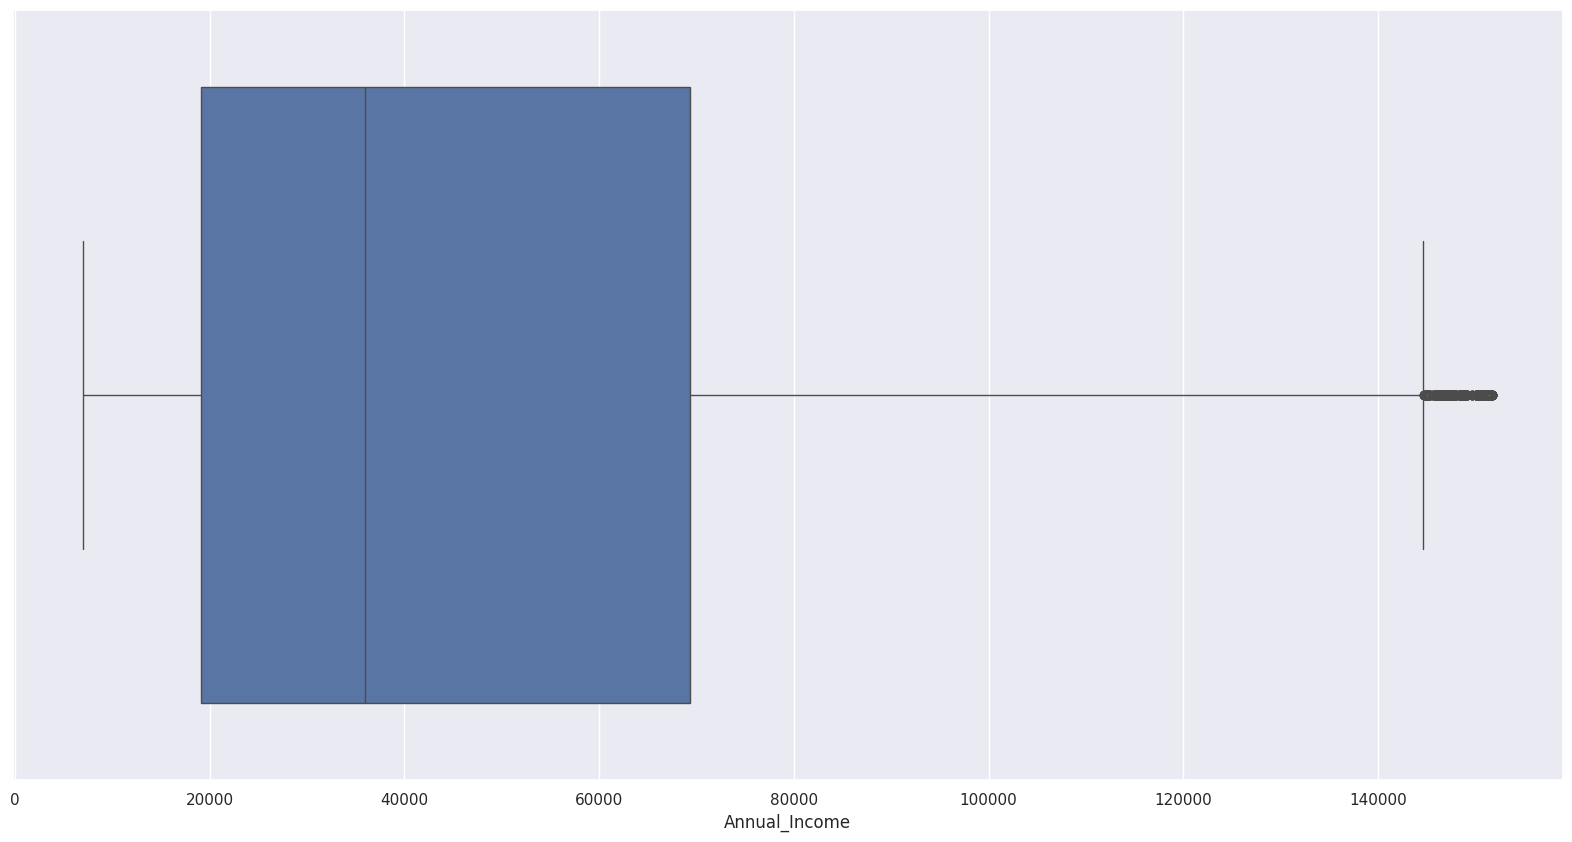

In [79]:
sns.boxplot(x=df_cleaned['Annual_Income'])


<Axes: xlabel='Outstanding_Debt'>

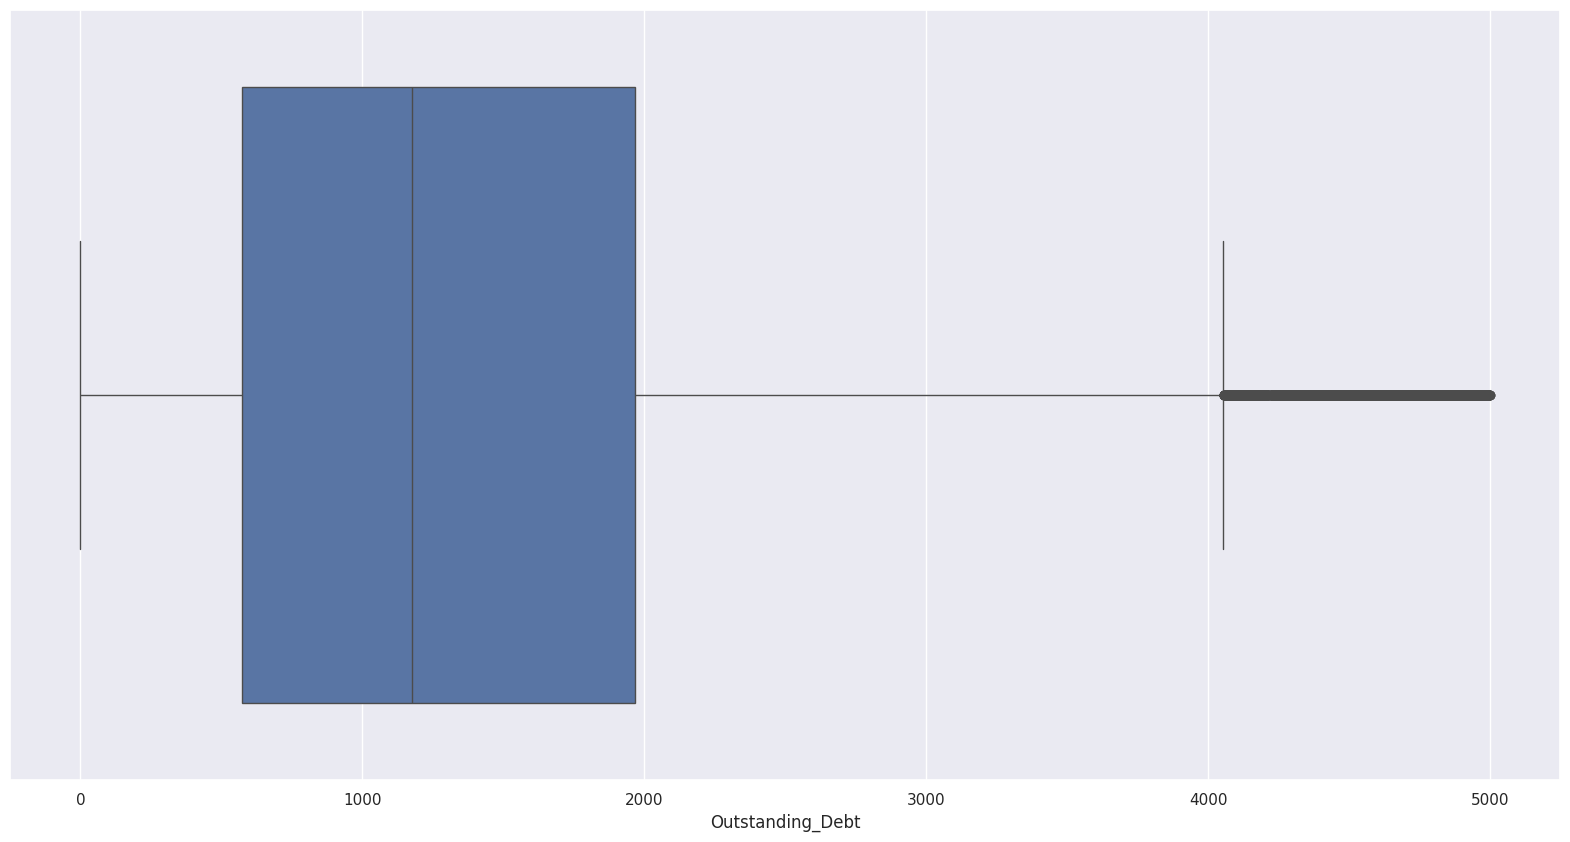

In [80]:
sns.boxplot(x=df_cleaned['Outstanding_Debt'])


In [81]:
occupation_count = df_cleaned['Occupation'].value_counts(dropna = False)
occupation_count

,count
Occupation,
Lawyer,4770
Teacher,4636
Mechanic,4619
Engineer,4617
Architect,4598
Scientist,4578
Entrepreneur,4558
Accountant,4535
Media_Manager,4532


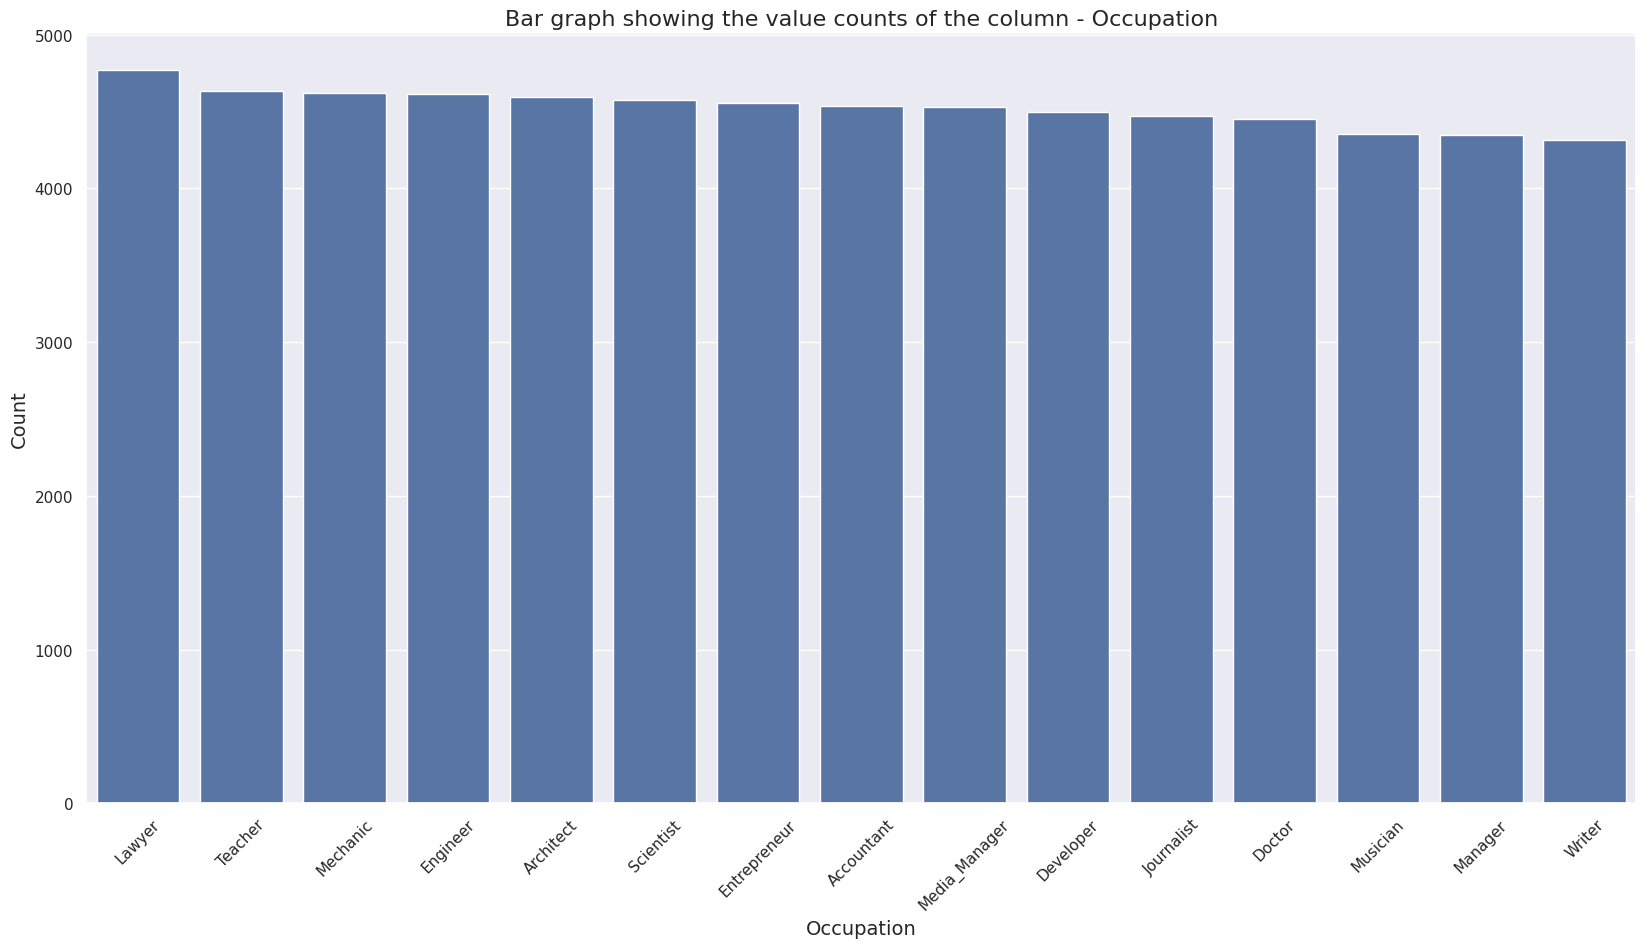

In [82]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

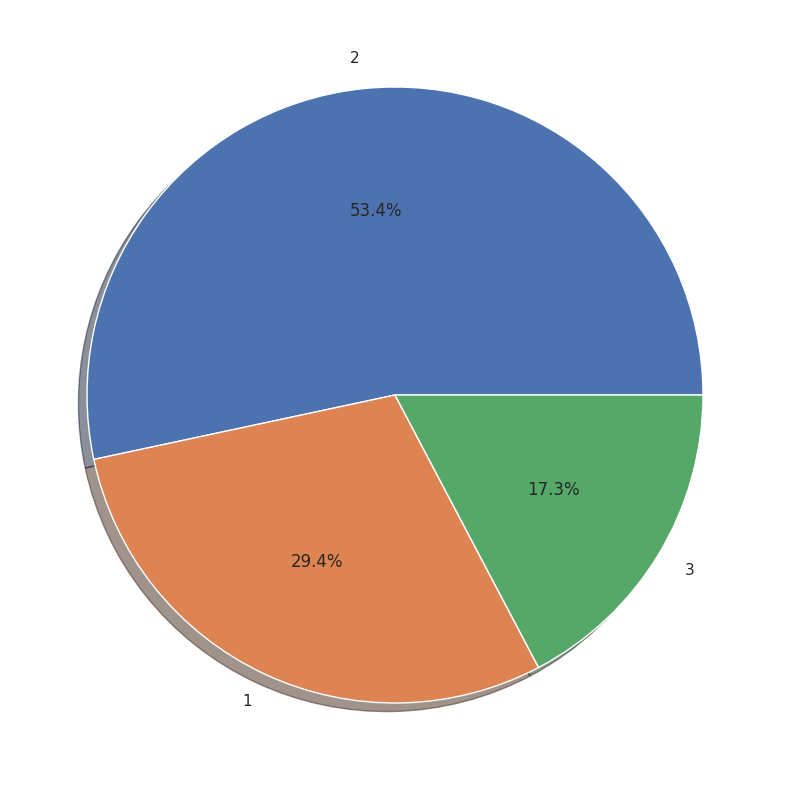

In [83]:
# Explore data balance
label = df_cleaned.Credit_Score.value_counts().index
label_count = df_cleaned.Credit_Score.value_counts().values
plt.pie(data=df_cleaned, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.093023,-0.173143,0.001358,-0.202353,0.234206,0.185696,0.000923,0.033029,-0.002391,0.160786
Annual_Income,0.093023,1.000000,-0.227381,0.002878,-0.264309,0.259222,0.179454,0.008248,0.332777,-0.004454,0.193939
Delay_from_due_date,-0.173143,-0.227381,1.000000,0.010782,0.569789,-0.484996,-0.333194,-0.005463,-0.078878,0.003893,-0.429198
Num_of_Delayed_Payment,0.001358,0.002878,0.010782,1.000000,0.008015,-0.008178,-0.006479,-0.000321,0.007264,0.000896,-0.007843
Outstanding_Debt,-0.202353,-0.264309,0.569789,0.008015,1.000000,-0.627050,-0.324285,-0.007305,-0.094883,0.000518,-0.383912
Credit_History_Age,0.234206,0.259222,-0.484996,-0.008178,-0.627050,1.000000,0.385210,0.006838,0.089458,-0.002261,0.386778
Payment_of_Min_Amount,0.185696,0.179454,-0.333194,-0.006479,-0.324285,0.385210,1.000000,-0.001414,0.061784,-0.000912,0.287928
Total_EMI_per_month,0.000923,0.008248,-0.005463,-0.000321,-0.007305,0.006838,-0.001414,1.000000,0.003207,0.001564,0.006557
Payment_Behaviour,0.033029,0.332777,-0.078878,0.007264,-0.094883,0.089458,0.061784,0.003207,1.000000,0.002988,0.116677
Monthly_Balance,-0.002391,-0.004454,0.003893,0.000896,0.000518,-0.002261,-0.000912,0.001564,0.002988,1.000000,-0.001825


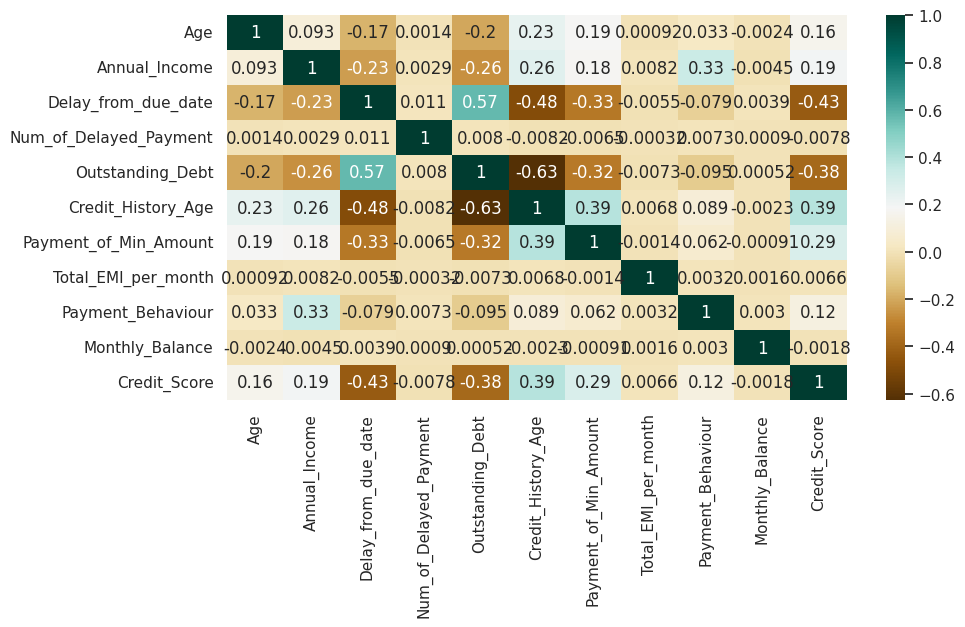

In [84]:
plt.figure(figsize=(10,5))
# Include only numerical features for correlation calculation
numerical_features = df_cleaned.select_dtypes(include=np.number).columns
c = df_cleaned[numerical_features].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Payment_Behaviour'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>,
        <Axes: title={'center': 'Credit_Score'}>, <Axes: >]], dtype=object)

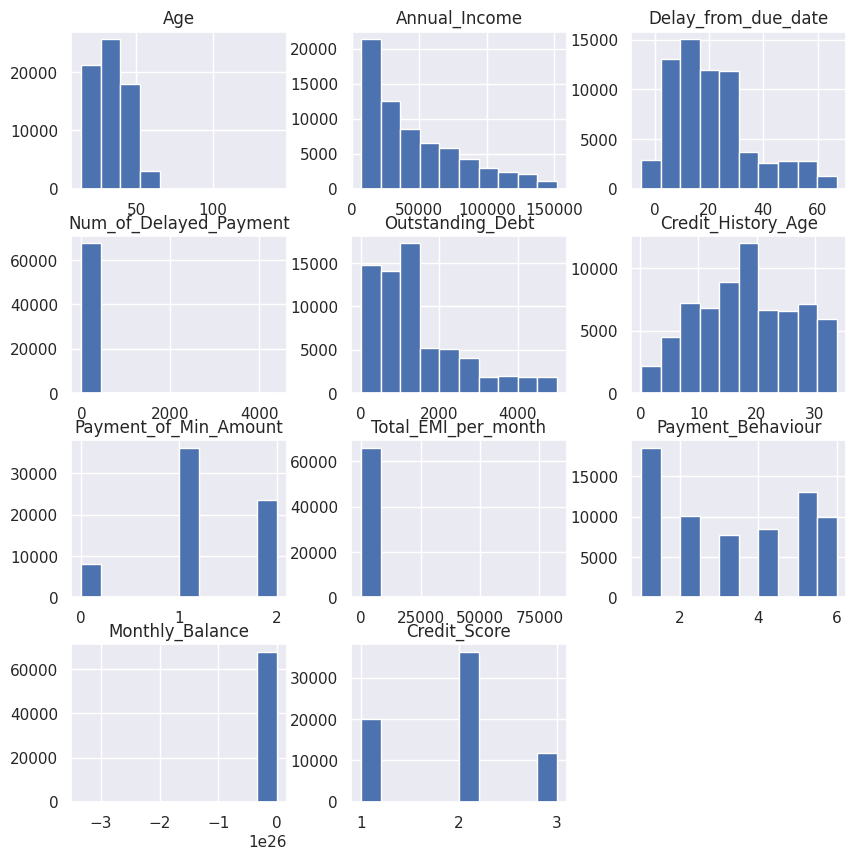

In [85]:
df_cleaned.hist(figsize=(10, 10))


In [86]:
df_cleaned.head()


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2


In [87]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.070312,Scientist,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,3
3,0.070312,Scientist,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,3
6,0.070312,Scientist,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,3
9,0.109375,Teacher,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,3
10,0.109375,Teacher,0.192389,0.111111,0.000455,0.121012,0.795252,2,0.000229,6.0,1.0,2


In [88]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.070312,Scientist,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,3
3,0.070312,Scientist,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,3
6,0.070312,Scientist,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,3
9,0.109375,Teacher,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,3
10,0.109375,Teacher,0.192389,0.111111,0.000455,0.121012,0.795252,2,0.000229,6.0,1.0,2


In [89]:
df_cleaned.columns


Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [90]:
df_cleaned = pd.get_dummies(df_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cleaned.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.070312,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,...,False,False,False,False,False,False,False,True,False,False
3,0.070312,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,...,False,False,False,False,False,False,False,True,False,False
6,0.070312,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,...,False,False,False,False,False,False,False,True,False,False
9,0.109375,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,...,False,False,False,False,False,False,False,False,True,False
10,0.109375,0.192389,0.111111,0.000455,0.121012,0.795252,2,0.000229,6.0,1.0,...,False,False,False,False,False,False,False,False,True,False


In [91]:
#Select all columns
feed = df_cleaned[['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']]

In [92]:
df_train_x = feed.drop('Credit_Score',axis = 1)
df_train_y = feed['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.15, random_state=72)

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [94]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy)

confusion matrics= [[2095  854   88]
 [ 793 3973  607]
 [  80  597 1096]]
  
accuracy= 0.7035254836492193


In [95]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn_y_pred = kn.predict(x_test)
kn_cm = confusion_matrix(y_test,kn_y_pred)
kn_accuracy = accuracy_score(y_test,kn_y_pred)
print("confusion matrics=",kn_cm)
print("  ")
print("accuracy=",kn_accuracy)

confusion matrics= [[1869 1066  102]
 [1120 3697  556]
 [ 186  898  689]]
  
accuracy= 0.6142590592163409


In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=1,
    max_features='sqrt'
)
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)
rf_cm = confusion_matrix(y_test,rf_y_pred)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("confusion matrics=",rf_cm)
print("  ")
print("accuracy=",rf_accuracy)

confusion matrics= [[2411  597   29]
 [ 618 4396  359]
 [   9  560 1204]]
  
accuracy= 0.7867033290778749


In [97]:
test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [98]:
test = test.dropna().copy()


In [99]:
#Drop the column which is out of model scope
test_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_test = test.drop(d_col , axis=1).copy()
drop_test


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.574949,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.574949,High_spent_Medium_value_payments,361.44400385378196
4,28,_______,34847.84,3,1,605.03,27 Years and 3 Months,No,18.816215,High_spent_Large_value_payments,485.2984336755923
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816215,Low_spent_Large_value_payments,303.3550833433617
7,28,Teacher,34847.84,3,2_,605.03,27 Years and 6 Months,No,18.816215,!@9#%8,421.44796447960783
...,...,...,...,...,...,...,...,...,...,...,...
49992,29,Architect,20002.88,33,25,3571.7,6 Years and 4 Months,Yes,60.964772,Low_spent_Small_value_payments,314.8151526456419
49993,29,Architect,20002.88,33,25,3571.7,6 Years and 5 Months,Yes,60.964772,Low_spent_Small_value_payments,350.23147346441687
49994,29,_______,20002.88,33,22,3571.7,6 Years and 6 Months,Yes,60.964772,High_spent_Small_value_payments,341.179047488264
49997,25,Mechanic,39628.99,23,5,502.38,32 Years and 0 Months,No,35.104023,Low_spent_Large_value_payments,349.7263321025098


In [100]:
#Drop the incorrect data
drop_test = drop_test[drop_test['Occupation'].str.contains('_______') == False]
drop_test = drop_test[drop_test['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [101]:
# Revise the incorrect data whole table
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount']
for i in col_int:
  for c in sym:
    drop_test[i] = drop_test[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_test[i] = drop_test[i].replace(c,'')
drop_test.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.57494921489417,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.57494921489417,High_spent_Medium_value_payments,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816214573128885,Low_spent_Large_value_payments,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18 Years and 6 Months,No,246.9923194537421,Low_spent_Large_value_payments,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17 Years and 11 Months,No,16.415451659824875,High_spent_Medium_value_payments,425.7266258262577


In [102]:
#Transform the information to the value
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace('Months','')

In [103]:
#Transform the information to the value as level
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_test.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,3,7,809.98,22.9,No,49.57494921489417,1,186.26670208571772
1,24,Scientist,19114.12,3,9,809.98,22.10,No,49.57494921489417,5,361.44400385378196
5,28,Teacher,34847.84,3,3,605.03,27.4,No,18.816214573128885,3,303.3550833433617
9,35,Engineer,143162.64,6,3,1303.01,18.6,No,246.9923194537421,3,788.1145499681528
12,55,Entrepreneur,30689.89,5,6,632.46,17.11,No,16.415451659824875,5,425.7266258262577


In [104]:
#Transform the object data the be float data type
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_test[i] = drop_test[i].astype(float)
drop_test.dtypes

,0
Age,float64
Occupation,object
Annual_Income,float64
Delay_from_due_date,float64
Num_of_Delayed_Payment,float64
Outstanding_Debt,float64
Credit_History_Age,float64
Payment_of_Min_Amount,object
Total_EMI_per_month,float64
Payment_Behaviour,float64


In [105]:
# Transform the target data to numerical
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('No', '2')
drop_test['Payment_of_Min_Amount'] = drop_test[['Payment_of_Min_Amount']].apply(pd.to_numeric)

In [106]:
drop_test = pd.get_dummies(drop_test, prefix='Occupation', columns=['Occupation'], drop_first=False)
drop_test.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,False,False,False,False,False,False,False,True,False,False
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,False,False,False,False,False,False,False,True,False,False
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,False,False,False,False,False,False,False,False,True,False
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,False,False,False,False,False,False,False,False,False,False
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,True,False,False,False,False,False,False,False,False,False


In [107]:
df_cleaned.columns

Index(['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer'],
      dtype='object')

In [108]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 67881 entries, 0 to 99997
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       67881 non-null  float64
 1   Annual_Income             67881 non-null  float64
 2   Delay_from_due_date       67881 non-null  float64
 3   Num_of_Delayed_Payment    67881 non-null  float64
 4   Outstanding_Debt          67881 non-null  float64
 5   Credit_History_Age        67881 non-null  float64
 6   Payment_of_Min_Amount     67881 non-null  int64  
 7   Total_EMI_per_month       67881 non-null  float64
 8   Payment_Behaviour         67881 non-null  float64
 9   Monthly_Balance           67881 non-null  float64
 10  Credit_Score              67881 non-null  int64  
 11  Occupation_Accountant     67881 non-null  bool   
 12  Occupation_Architect      67881 non-null  bool   
 13  Occupation_Developer      67881 non-null  bool   
 14  Occupation_

In [109]:
drop_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 22703 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       22703 non-null  float64
 1   Annual_Income             22703 non-null  float64
 2   Delay_from_due_date       22703 non-null  float64
 3   Num_of_Delayed_Payment    22703 non-null  float64
 4   Outstanding_Debt          22703 non-null  float64
 5   Credit_History_Age        22703 non-null  float64
 6   Payment_of_Min_Amount     22703 non-null  int64  
 7   Total_EMI_per_month       22703 non-null  float64
 8   Payment_Behaviour         22703 non-null  float64
 9   Monthly_Balance           22703 non-null  float64
 10  Occupation_Accountant     22703 non-null  bool   
 11  Occupation_Architect      22703 non-null  bool   
 12  Occupation_Developer      22703 non-null  bool   
 13  Occupation_Doctor         22703 non-null  bool   
 14  Occupation_

In [110]:
drop_test.columns


Index(['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer'],
      dtype='object')

In [111]:
drop_test


,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,False,False,False,False,False,False,False,True,False,False
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,False,False,False,False,False,False,False,True,False,False
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,False,False,False,False,False,False,False,False,True,False
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,False,False,False,False,False,False,False,False,False,False
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,50.0,37188.10,3.0,12.0,620.64,30.80,2,33013.000000,3.0,257.095501,...,False,False,False,False,False,False,False,False,False,True
49992,29.0,20002.88,33.0,25.0,3571.70,6.40,1,60.964772,1.0,314.815153,...,False,False,False,False,False,False,False,False,False,False
49993,29.0,20002.88,33.0,25.0,3571.70,6.50,1,60.964772,1.0,350.231473,...,False,False,False,False,False,False,False,False,False,False
49997,25.0,39628.99,23.0,5.0,502.38,32.00,2,35.104023,3.0,349.726332,...,False,False,False,False,True,False,False,False,False,False


In [112]:
Credit_Score = rf.predict(drop_test)


In [113]:
# Select the same features used for training, excluding 'Credit_Score'
features = ['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']  # Make sure this list matches your training data features

# Use only the selected features for prediction
Credit_Score = rf.predict(drop_test[features])

In [114]:
drop_test['Credit_Score'] = Credit_Score
drop_test

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Score
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,False,False,False,False,False,False,True,False,False,2
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,False,False,False,False,False,False,True,False,False,2
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,False,False,False,False,False,False,False,True,False,2
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,False,False,False,False,False,False,False,False,False,2
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,50.0,37188.10,3.0,12.0,620.64,30.80,2,33013.000000,3.0,257.095501,...,False,False,False,False,False,False,False,False,True,2
49992,29.0,20002.88,33.0,25.0,3571.70,6.40,1,60.964772,1.0,314.815153,...,False,False,False,False,False,False,False,False,False,2
49993,29.0,20002.88,33.0,25.0,3571.70,6.50,1,60.964772,1.0,350.231473,...,False,False,False,False,False,False,False,False,False,2
49997,25.0,39628.99,23.0,5.0,502.38,32.00,2,35.104023,3.0,349.726332,...,False,False,False,True,False,False,False,False,False,2
